In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

# Orthogonality of Functions
This notebook is intented to help visualize what it means for functions to be orthogonal, and how we can use Fourier's trick to decompose a function into an orthonormal set of functions.

First let's start with the stationary states of the infinite square well as an example.
$$ \psi_n(x) = \sqrt{\frac{2}{a}}\sin\left(\frac{n\pi}{a}x\right)$$
$$ E_n = \frac{n^2\pi^2\hbar^2}{2ma^2}$$



In [2]:
def psi(x, a=1, n=1):
    return np.sqrt(2 / a) * np.sin(n * np.pi * x / a)

def En(a=1, n=1, m=const.m_e):
    return (n * np.pi * const.hbar)**2 / (2 * m * a**2)

def Psi(x, t, a=1, n=1, m=const.m_e):
    energy = En(a=a, n=n, m=m)
    if isinstance(t, (list, np.ndarray)):
        return psi(x[:, np.newaxis], a=a, n=n) * np.exp(-1j * energy * t[np.newaxis, :] / const.hbar)
    else:
        return psi(x, a=a, n=n) * np.exp(-1j * energy * t / const.hbar)

Let's look at two states and their product.

<IPython.core.display.Javascript object>


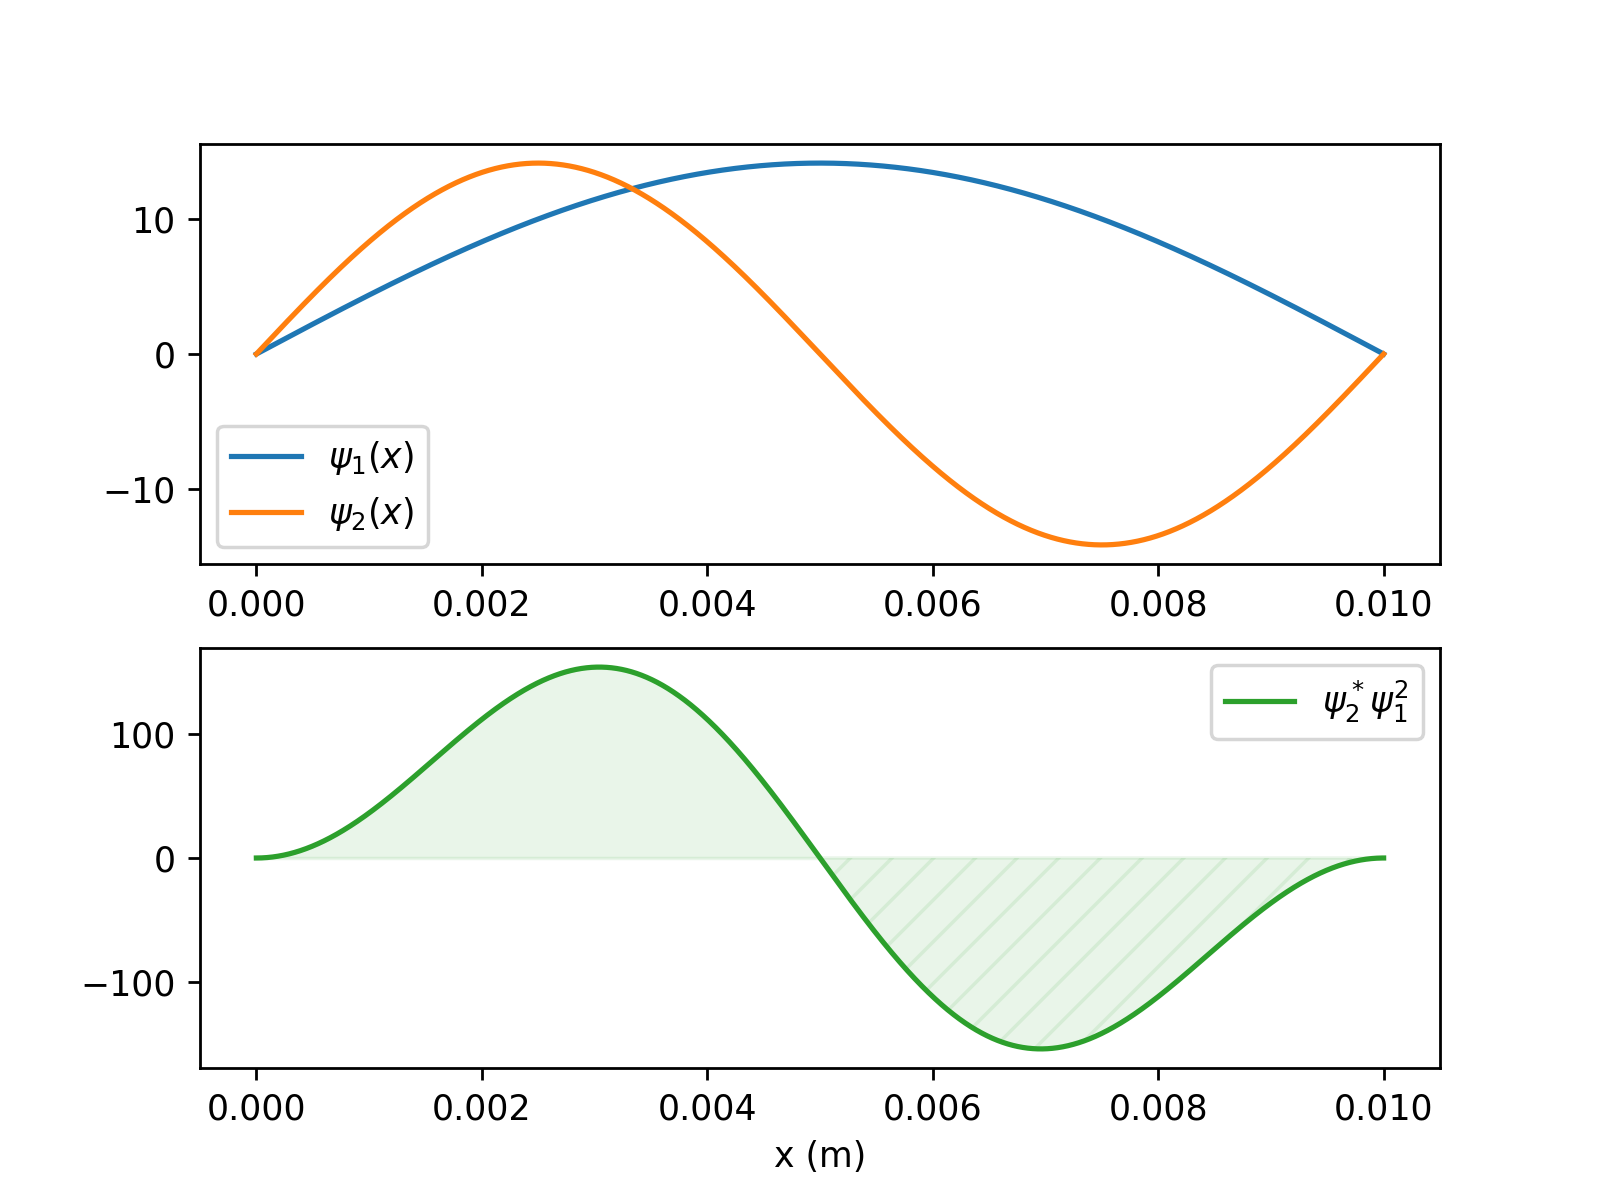

In [12]:
a = 0.01  # 1 cm
n1 = 1  # Choose two energy states
n2 = 2
xarr = np.linspace(0, a, 10000)  # Creates an array from 0 to a with 10000 points
psi1 = psi(xarr, a=a, n=n1)
psi2 = psi(xarr, a=a, n=n2)

fig = plt.figure()
ax1 = plt.subplot(211)
plt.plot(xarr, psi1, label=f'$\psi_{n1}(x)$')
plt.plot(xarr, psi2, label=f'$\psi_{n2}(x)$')
plt.legend()
plt.subplot(212, sharex=ax1)
prod = np.conj(psi2) * psi1
plt.plot(xarr, prod, 'C2', label=f'$\psi_{n2}^*\psi_{n1}^2$')
plt.fill_between(xarr, 0, prod, where=prod>0, interpolate=True, color='C2',
                 alpha=0.1, hatch='')
plt.fill_between(xarr, 0, prod, where=prod<0, interpolate=True, color='C2',
                 alpha=0.1, hatch='//')
plt.xlabel('x (m)')
plt.legend()